In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def process_ocean_index_data(data_file):
    with open(data_file, "r") as f:
        data_content = f.readlines()
        data_content = [item.rstrip("\n") for item in data_content]
        data_content = [item.lstrip(" ") for item in data_content]
        data_content = [item for item in data_content if len(item.split(" ")) == 13]
        years = [item.split(" ")[0] for item in data_content]
        ts = np.array([item.split(" ")[1:] for item in data_content]).T
        cols = [i for i in range(1, 13)]
        assert len(ts) == len(cols)
        df_dict = dict(zip(cols, ts))
        df_dict["year"] = years
        df = pd.DataFrame.from_dict(df_dict).set_index("year")
        if "2024" in df.index:
            df = df.drop(index="2024")
        filename = data_file.split(".")[0] + ".csv"
        df.to_csv(filename)

In [3]:
# import os
# for file in os.listdir("."):
#     if file.endswith(".data"):
#         print(f"processing {file}")
#         process_ocean_index_data(file)

In [16]:
nino_years = pd.read_csv("nina3.csv").year.to_list()

In [18]:
# get summary for all the time series datasets
dfs = []
names = []
import os
for file in os.listdir("."):
    if file.endswith(".csv"):
        df = pd.read_csv(file)
        year = df.year.to_list()
        if year == nino_years:
            dfs.append(df)
            print(file)
            names.append(file.split(".")[0])
print(len(dfs))
print(names)

ammsst.csv
ea.csv
epo.csv
nao.csv
nina1.csv
nina3.csv
nina34.csv
nina4.csv
noi.csv
pacwarm.csv
pna.csv
qbo.csv
soi.csv
solar.csv
tna.csv
tni.csv
tsa.csv
whwp.csv
wp.csv
19
['ammsst', 'ea', 'epo', 'nao', 'nina1', 'nina3', 'nina34', 'nina4', 'noi', 'pacwarm', 'pna', 'qbo', 'soi', 'solar', 'tna', 'tni', 'tsa', 'whwp', 'wp']


In [25]:
year_month = []
for year in nino_years:
    for i in range(1,13):
        year_month.append(f"{year}_{i}")
len(year_month)

912

In [26]:
# combine the multivariate time series together.
combined_dicts = {}
for i in range(len(dfs)):
    ts = dfs[i].drop(["year"], axis=1).to_numpy().flatten()
    combined_dicts[names[i]] = ts

df_combined = pd.DataFrame.from_dict(combined_dicts)    
df_combined.index = year_month

In [27]:
df_cleaned = df_combined[~df_combined.isin([-99.99, -99.90]).any(axis=1)]
df_cleaned.shape

(792, 19)

In [28]:
df_cleaned.head()

,ammsst,ea,epo,nao,nina1,nina3,nina34,nina4,noi,pacwarm,pna,qbo,soi,solar,tna,tni,tsa,whwp,wp
1951_1,2.14,-0.74,-0.81,-0.42,24.11,24.79,25.24,27.21,2.702,-0.728,-1.18,-6.01,2.5,1079,0.06,1.315,-0.98,-0.17,-0.07
1951_2,0.94,-1.66,-1.32,0.35,25.19,25.65,25.71,27.09,1.878,-0.836,-2.11,-5.32,1.5,1019,-0.17,1.461,-0.70,-0.30,-0.58
1951_3,2.29,0.11,0.20,-1.47,25.74,26.87,26.90,27.74,3.103,-0.798,-1.09,-1.93,-0.2,1025,-0.07,1.590,-0.87,-0.93,-0.29
1951_4,3.63,-2.31,0.02,-0.38,25.29,27.37,27.58,28.21,-3.880,-0.799,0.47,0.91,-0.5,1271,0.17,1.457,-0.51,-0.70,-0.19
1951_5,3.70,0.93,-0.04,-0.50,24.59,27.07,27.92,29.18,-2.213,-0.674,1.19,2.26,-1.1,1686,0.14,1.615,-0.37,-0.93,0.70


<Axes: >

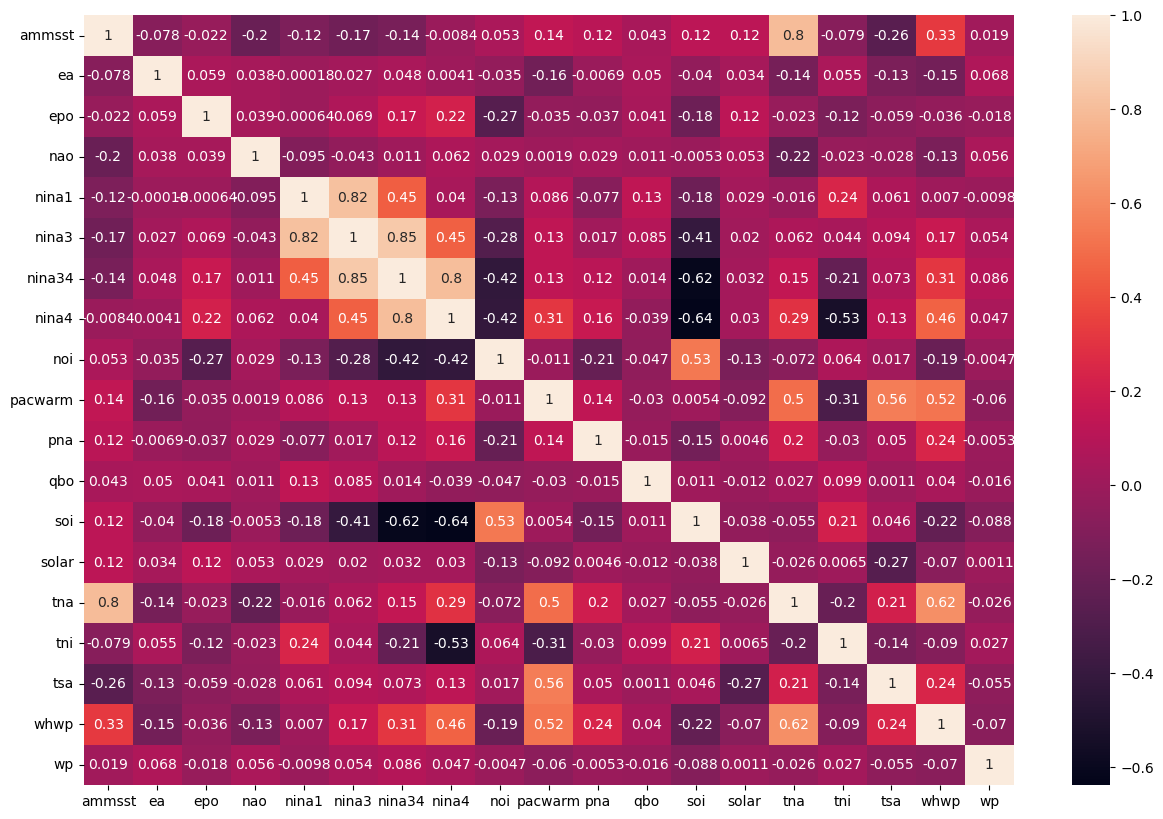

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_cleaned.corr(), annot=True)

In [32]:
df_cleaned.to_csv("indices_ocean_19_timeseries.csv")